<a href="https://colab.research.google.com/github/matteobalducci/Startup_Analysis/blob/main/Matteo_Balducci_Startup_Analysis_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021:

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other.

    What is the **shape** of the `fnd` DataFrame?

In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file paths and years
file_paths = ['/content/drive/My Drive/data/startup_funding2019.csv',
              '/content/drive/My Drive/data/startup_funding2020.csv',
              '/content/drive/My Drive/data/startup_funding2021.csv']
years = [2019, 2020, 2021]

# Initialize a list to hold DataFrames
dfs = []

# Loop over the file paths and years
for file_path, year in zip(file_paths, years):
    # Load the data into a temporary DataFrame
    df_tmp = pd.read_csv(file_path)

    # Add a new column for the year
    df_tmp['Year'] = year

    # Append the temporary DataFrame to the list
    dfs.append(df_tmp)

# Concatenate all the dataframes in the list
fnd = pd.concat(dfs)

# Print the shape of the final DataFrame
print(fnd.shape)
print(fnd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2343, 10)
       Company/Brand Founded HeadQuarter                 Sector  \
0     Bombay Shaving     NaN         NaN              Ecommerce   
1          Ruangguru  2014.0      Mumbai                 Edtech   
2           Eduisfun     NaN      Mumbai                 Edtech   
3           HomeLane  2014.0     Chennai        Interior design   
4           Nu Genes  2004.0   Telangana               AgriTech   
...              ...     ...         ...                    ...   
1197        Gigforce    2019    Gurugram  Staffing & Recruiting   
1198          Vahdam    2015   New Delhi       Food & Beverages   
1199    Leap Finance    2019   Bangalore     Financial Services   
1200    CollegeDekho    2015    Gurugram                 EdTech   
1201          WeRize    2019   Bangalore     Financial Services   

                                           What it does

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types.

    What is the **total** `Amount($)` of funding given in the three years available?

In [5]:
# Convert 'Amount($)' to string and remove commas
fnd['Amount($)'] = fnd['Amount($)'].astype(str).str.replace(',', '')

# Convert 'Amount($)' to numeric
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'], errors='coerce')
fnd['Year'] = pd.to_numeric(fnd['Year'], errors='coerce')
fnd['Founded'] = pd.to_numeric(fnd['Founded'], errors='coerce')

# Check the data types to confirm
print(fnd.dtypes)

# Calculate the total amount of funding
total_funding = fnd['Amount($)'].sum()

# Print the total amount of funding
print('Total funding:', total_funding)

fnd.head(10)


Company/Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What it does      object
Founders          object
Investor          object
Amount($)        float64
Stage             object
Year               int64
dtype: object
Total funding: 3558051.83


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,NaN,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,NaN,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",NaN,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",NaN,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),NaN,NaN,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",NaN,Pre series A,2019
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,NaN,Series A,2019
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,NaN,Series G,2019


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [7]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [8]:
# Filter the data for the year 2020
fnd_2020 = fnd[fnd['Year'] == 2020]

# Count the number of companies funded by each investor in 2020
investor_counts_2020 = fnd_2020['Investor'].value_counts()

# Find the rank of "Inflection Point Ventures"
rank = investor_counts_2020.rank(method='min', ascending=False)['Inflection Point Ventures']

# Print the rank
print(rank)


4.0


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**:
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame:
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?

In [9]:
#1. starting from the sps DataFrame, create a new DF called sps_loc where you group by Location and show, for each city in the dataset, the average Rating and Salary;

# Define the file path
file_path = '/content/drive/My Drive/data/Software Professionals Salary.csv'

# Load the data into a DataFrame
sps = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(sps.head())


# Group by 'Location' and calculate the average 'Rating' and 'Salary'
sps_loc = sps.groupby('Location')[['Rating', 'Salary']].mean()

# Reset the index
sps_loc.reset_index(inplace=True)

# Print the new DataFrame
print(sps_loc)

print(fnd.columns)

#2 starting from the fnd DataFrame, create a new DF called fnd_loc where you group by HeadQuarter and show, for each city in the dataset for the year 2021, the total number of Company/Brands funded and the total Amount($) invested;

# Filter the data for the year 2021
fnd_2021 = fnd[fnd['Year'] == 2021]

# Group by 'HeadQuarter' and calculate the total number of 'Company/Brands' funded and the total 'Amount($)' invested
fnd_loc = fnd_2021.groupby('HeadQuarter').agg({'Company/Brand': 'count', 'Amount($)': 'sum'})

# Reset the index
fnd_loc.reset_index(inplace=True)

# Print the new DataFrame
print(fnd_loc)

#3 merge the two DataFrames you just created so to keep just the cities that are in both datasets and save the results in a third DataFrame called sps_fnd_loc (note: make sure to use the correct type of join);

# Merge the two DataFrames
sps_fnd_loc = pd.merge(sps_loc, fnd_loc, left_on='Location', right_on='HeadQuarter', how='inner')

# Print the new DataFrame
print(sps_fnd_loc)

#4

# Clear the 'HeadQuarter' column
sps_fnd_loc = sps_fnd_loc.drop('HeadQuarter', axis=1)

# Create a new column 'Amount($MM)' by dividing 'Amount($)' by 1,000,000
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000

# Clear column 'Amount($)'
sps_fnd_loc = sps_fnd_loc.drop('Amount($)', axis=1)

# Rename the columns
sps_fnd_loc = sps_fnd_loc.rename(columns= {'Location': 'City',
                                           'Rating': 'Avg. Rating',
                                           'Salary': 'Avg. Salary',
                                           'Company/Brand': 'Nr. Companies Funded',
                                           'Amount($MM)': 'Sum Funding ($MM)'})

display(sps_fnd_loc)
highest_rating_city = sps_fnd_loc.loc[sps_fnd_loc['Avg. Rating'].idxmax(), 'City']
num_companies_funded = sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_rating_city, 'Nr. Companies Funded'].values[0]

print("Cities with the highest average rating:", highest_rating_city)
print("Number of companies founded:", num_companies_funded)

   Rating                      Company Name          Job Title   Salary  \
0     3.8                            Sasken  Android Developer   400000   
1     4.5  Advanced Millennium Technologies  Android Developer   400000   
2     4.0                         Unacademy  Android Developer  1000000   
3     3.8                SnapBizz Cloudtech  Android Developer   300000   
4     4.4            Appoids Tech Solutions  Android Developer   600000   

   Salaries Reported   Location Employment Status Job Roles  
0                  3  Bangalore         Full Time   Android  
1                  3  Bangalore         Full Time   Android  
2                  3  Bangalore         Full Time   Android  
3                  3  Bangalore         Full Time   Android  
4                  3  Bangalore         Full Time   Android  
         Location    Rating         Salary
0       Bangalore  3.920232  735344.739593
1         Chennai  3.902726  584559.661513
2       Hyderabad  3.914484  679099.157376
3    

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,0.0
1,Chennai,3.902726,584559.661513,40,0.0
2,Hyderabad,3.914484,679099.157376,34,0.0
3,Jaipur,3.940741,629135.802469,11,0.0
4,Kolkata,4.024719,710925.573034,5,0.0
5,Mumbai,3.881709,961180.368491,200,1.0
6,New Delhi,3.943415,658756.735632,143,0.0
7,Pune,3.886082,690476.311153,46,0.0


Cities with the highest average rating: Kolkata
Number of companies founded: 5


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees?

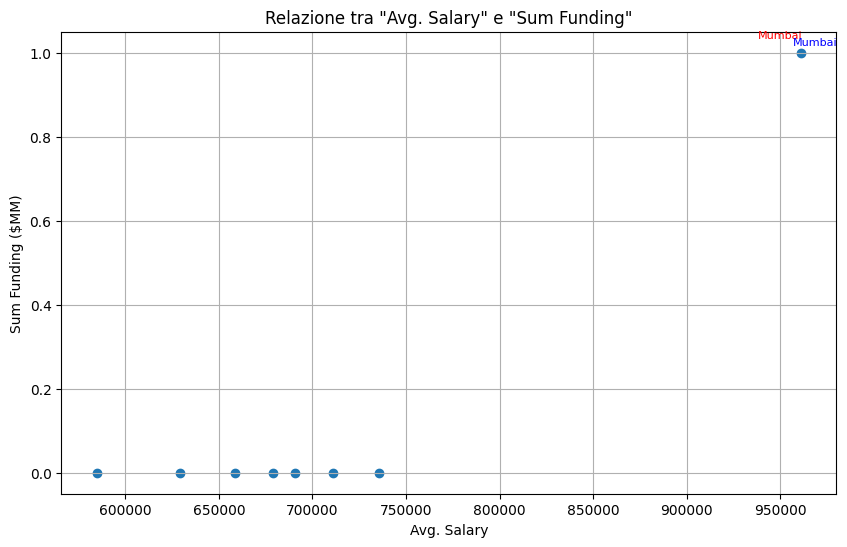

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sps_fnd_loc['Avg. Salary'], sps_fnd_loc['Sum Funding ($MM)'])
plt.xlabel('Avg. Salary')
plt.ylabel('Sum Funding ($MM)')
plt.title('Relazione tra "Avg. Salary" e "Sum Funding"')
plt.grid(True)

# Cities with the highest salary and funding
highest_funding_city = sps_fnd_loc.loc[sps_fnd_loc['Sum Funding ($MM)'].idxmax(), 'City']
highest_salary_city = sps_fnd_loc.loc[sps_fnd_loc['Avg. Salary'].idxmax(), 'City']

# Find the city with the highest salary and funding
plt.annotate(highest_funding_city, (sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_funding_city, 'Avg. Salary'].values[0],
                                    sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_funding_city, 'Sum Funding ($MM)'].values[0]),
             textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=8, color='red')
plt.annotate(highest_salary_city, (sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_salary_city, 'Avg. Salary'].values[0],
                                   sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_salary_city, 'Sum Funding ($MM)'].values[0]),
             textcoords="offset points", xytext=(10, 5), ha='center', fontsize=8, color='blue')

plt.show()

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem.
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation.

In [12]:
import requests
from bs4 import BeautifulSoup

In [13]:
url = "https://www.census2011.co.in/city.php"
page = requests.get(url)

soup = BeautifulSoup(page.content, "html.parser")

results = soup.find_all("tbody")[0]

In [14]:
cities = pd.DataFrame([], columns=['RankPop','City','State','Population','Metropolitan','Sexratio','Literacy'])

In [16]:
cities.head(3)

,RankPop,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,"12,442,373","18,414,288",853,89.73
1,2,Delhi,Delhi,"11,034,555","16,314,838",876,87.59
2,3,Bangalore,Karnataka,"8,443,675","8,499,399",923,88.71


In [15]:
for rows in results.find_all("tr"):
    row = [el.text for el in rows.find_all("td")]
    row_loc = int(row[0])-1
    cities.loc[row_loc] = row

In [17]:
# 6A
print(cities[cities.Literacy==cities.Literacy.max()])

    RankPop    City    State Population Metropolitan Sexratio Literacy
150     151  Aizawl  Mizoram    293,416      293,416     1025    98.36


In [18]:
# 6B
set1 = set(sps_fnd_loc["City"].unique())
set2 = set(cities.City.unique())
set1.difference(set2)

{'New Delhi'}

In [19]:
cities['City'] = cities['City'].replace('Delhi', 'New Delhi')

In [20]:
sps_fnd_loc_lit = sps_fnd_loc.merge(cities[['City', 'Population', 'Literacy']], how='inner', on='City')
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),Population,Literacy
0,Bangalore,3.920232,735344.739593,425,0.0,"8,443,675",88.71
1,Chennai,3.902726,584559.661513,40,0.0,"4,646,732",90.18
2,Hyderabad,3.914484,679099.157376,34,0.0,"6,731,790",83.26
3,Jaipur,3.940741,629135.802469,11,0.0,"3,046,163",83.33
4,Kolkata,4.024719,710925.573034,5,0.0,"4,496,694",86.31
5,Mumbai,3.881709,961180.368491,200,1.0,"12,442,373",89.73
6,New Delhi,3.943415,658756.735632,143,0.0,"11,034,555",87.59
7,Pune,3.886082,690476.311153,46,0.0,"3,124,458",89.56


In [21]:
sps_fnd_loc_lit['Population'] = sps_fnd_loc_lit['Population'].str.replace(',','', regex=False)
sps_fnd_loc_lit['Population'] = pd.to_numeric(sps_fnd_loc_lit['Population'])

sps_fnd_loc_lit['Literacy'] = sps_fnd_loc_lit['Literacy'].str.replace(',','', regex=False)
sps_fnd_loc_lit['Literacy'] = pd.to_numeric(sps_fnd_loc_lit['Literacy'])

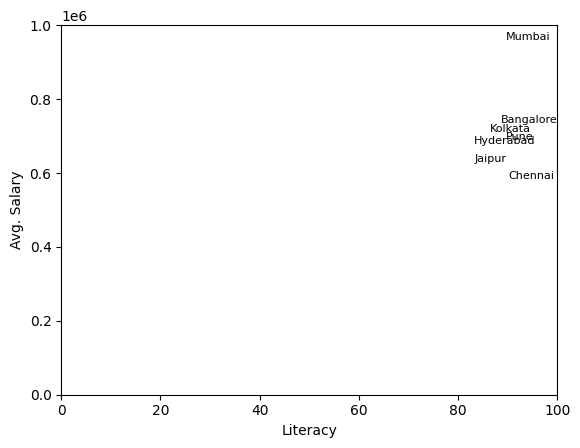

In [33]:

sps_fnd_loc_lit['Literacy'].dtype
sps_fnd_loc_lit['Avg. Salary'].dtype
# Substitute the NaN values ​​into the 'Avg. Salary' with 0
# sps_fnd_loc_lit['Avg. Salary'] = sps_fnd_loc_lit['Avg. Salary'].fillna(0)

# Replace the NaN values ​​in the 'Literacy' column with 0
# sps_fnd_loc_lit['Literacy'] = sps_fnd_loc_lit['Literacy'].fillna(0)
sps_fnd_loc_lit.head(7)
import numpy as np
import matplotlib.pyplot as plt

# Limit the range of x-axis and y-axis (i got problems with "finite values")
plt.xlim(0, 100)
plt.ylim(0, 1000000)

# Create the scatterplot with adjusted marker size
plt.scatter(sps_fnd_loc_lit['Literacy'], sps_fnd_loc_lit['Avg. Salary'], s=sps_fnd_loc_lit['Population']/1000)

# Add city labels to each circle
for i, row in sps_fnd_loc_lit.iterrows():
    x = row['Literacy']
    y = row['Avg. Salary']
    if np.isfinite(x) and np.isfinite(y):
        plt.text(x, y, row['City'], fontsize=8)

# Set axis labels
plt.xlabel('Literacy')
plt.ylabel('Avg. Salary')

plt.show()




